In [42]:
from matplotlib.pyplot import figure, rcParams
from conf_matplotlib import conf_matplotlib_claro, conf_matplotlib_oscuro
conf_matplotlib_oscuro()

from pandas import read_csv
from datetime import datetime
from numpy import nanmax

from control import tf, forced_response

def rate(data):
    from numpy import where
    i = where(data > 0)[0][0]
    pre_data = data[i:-1]
    pos_data = data[i+1:]
    new_data = pos_data/pre_data

    return new_data

def new(data):
    from numpy import where
    i = where(data > 0)[0][0]
    pre_data = data[i:-1]
    pos_data = data[i+1:]
    new_data = pos_data - pre_data

    return new_data

In [43]:
respuesta = !cd /Users/roberto/Mexico-COVID-19/ && git pull

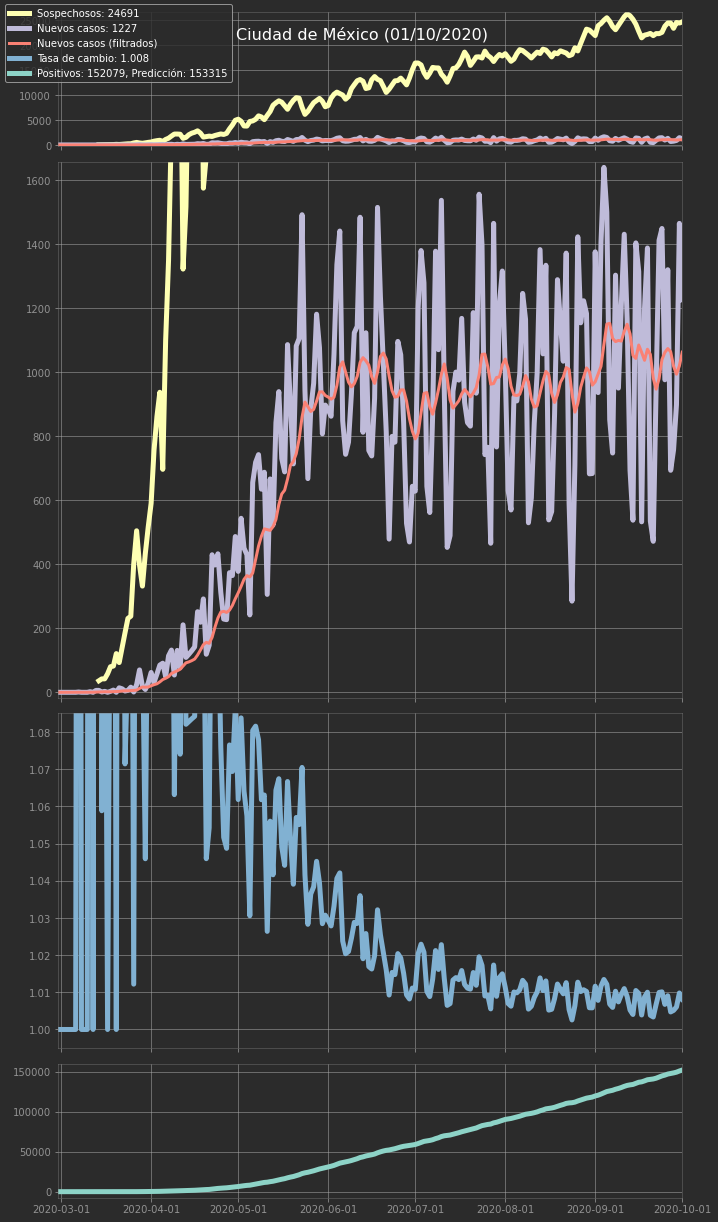

In [44]:
data = read_csv("/Users/roberto/Mexico-COVID-19/Mexico_COVID19_CTD.csv")

d_pos = data["CMX"].to_numpy()
d_sus = data["CMX_S"].to_numpy()
d_tot = data["CMX"].to_numpy()
d_fec = [datetime.strptime(fecha, "%Y-%m-%d") for fecha in data["Fecha"].to_numpy()]

d_cam = rate(d_pos)
d_nue = new(d_pos)

ts, xs = d_fec[-len(d_nue):], d_nue
G = tf([1], [7,1])
t1, y1, x1 = forced_response(G, T=range(len(xs)), U=xs, X0=0)
d_nue_fil = y1

ticks = [fecha for fecha in d_fec[-len(d_nue):] if fecha.day == 1]
ticklabels = [str(fecha.isocalendar()[1]) for fecha in ticks]

fig = figure(figsize=(10,17))
ax1, ax2, ax3, ax4 = fig.subplots(4, 1,
                                  gridspec_kw={'height_ratios': [2,8,5,2]},
                                  sharex=True)

cycle = rcParams['axes.prop_cycle'].by_key()['color']

lbl_pos = f"Positivos: {d_pos[-1]}, Predicción: {int(d_pos[-1]*d_cam[-1])}"
lbl_sus = f"Sospechosos: {int(d_sus[-1])}"
lbl_cam = f"Tasa de cambio: {round(d_cam[-1], 3)}"
lbl_nue = f"Nuevos casos: {d_nue[-1]}"
lbl_nue_fil = f"Nuevos casos (filtrados)"

ax1.plot(d_fec, d_sus, c=cycle[1], label=lbl_sus)
ax1.plot(d_fec[-len(d_nue):], d_nue, c=cycle[2], label=lbl_nue)
ax1.plot(d_fec[-len(d_nue_fil):], d_nue_fil, c=cycle[3], label=lbl_nue_fil, lw=3)

ax2.plot(d_fec, d_sus, c=cycle[1])
ax2.plot(d_fec[-len(d_nue):], d_nue, c=cycle[2])
ax2.plot(d_fec[-len(d_nue_fil):], d_nue_fil, c=cycle[3], lw=3)

ax3.plot(d_fec[-len(d_cam):], d_cam, c=cycle[4], label=lbl_cam)
ax4.plot(d_fec, d_pos, c=cycle[0], label=lbl_pos)
ax4.set_xlim(d_fec[-len(d_cam)], d_fec[-1])

ax1.set_ylim(-max([nanmax(d_sus), nanmax(d_nue)])*0.01,
             max([nanmax(d_sus), nanmax(d_nue)])*1.01)
ax2.set_ylim(-max([nanmax(d_nue)])*0.01,
             max([nanmax(d_nue)])*1.01)
ax3.set_ylim(0.995, 1.085)

ax1.set_xticks(ticks)
ax2.set_xticks(ticks)
ax3.set_xticks(ticks)
ax4.set_xticks(ticks)

fig.legend(loc="upper left")
fig.tight_layout()
fig.suptitle("Ciudad de México (" + d_fec[-1].strftime("%d/%m/%Y") + ")", fontsize=16);

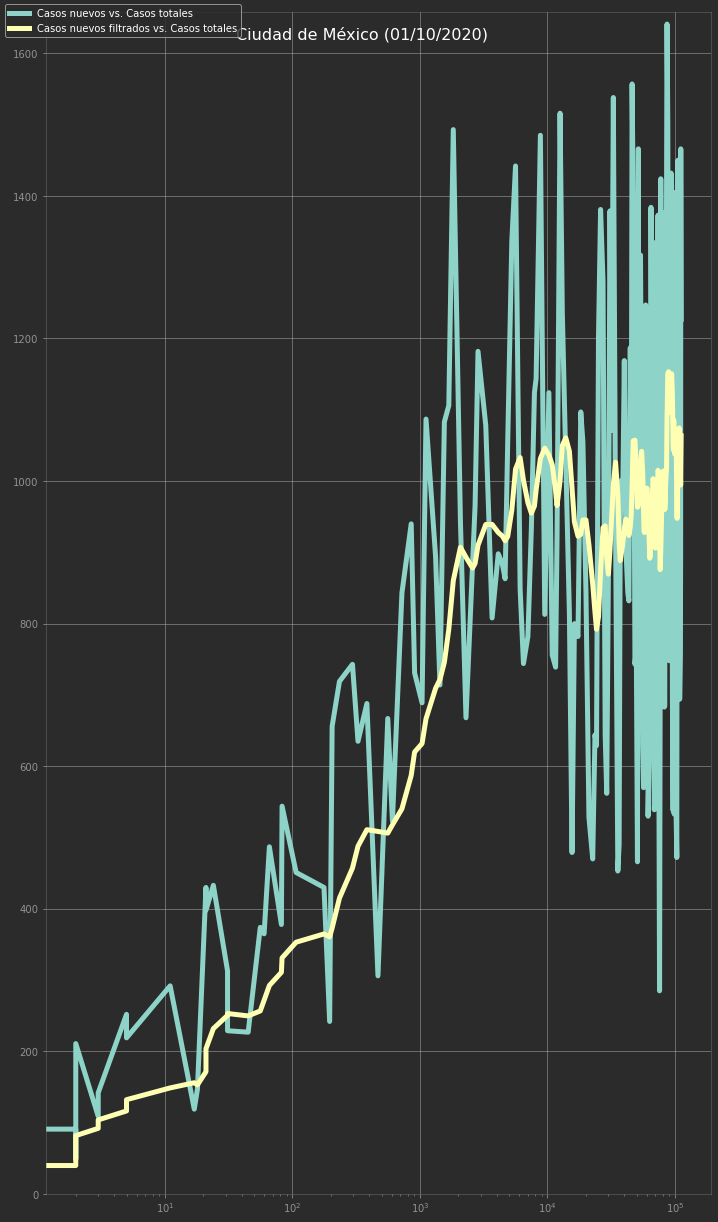

In [45]:
fig = figure(figsize=(10,17))
ax = fig.gca()

ax.plot(d_pos[:len(d_nue)], d_nue, label="Casos nuevos vs. Casos totales")
ax.plot(d_pos[:len(d_nue)], d_nue_fil, label="Casos nuevos filtrados vs. Casos totales")
ax.set_xscale('log')
ax.set_ylim(0, max(d_pos[:len(d_nue)]))
ax.set_ylim(0, max(d_nue)*1.01)

fig.legend(loc="upper left")
fig.tight_layout()
fig.suptitle("Ciudad de México (" + d_fec[-1].strftime("%d/%m/%Y") + ")", fontsize=16);

In [5]:
data[data.columns[data.columns.str.contains('CMX')]]

,CMX_S,CMX_I,CMX_L,CMX,CMX_R,CMX_D
0,NaN,0.0,0.0,0,0.0,0
1,NaN,0.0,0.0,0,0.0,0
2,NaN,0.0,0.0,0,0.0,0
3,NaN,0.0,0.0,0,0.0,0
4,NaN,0.0,0.0,0,0.0,0
...,...,...,...,...,...,...
236,24216.0,NaN,NaN,135472,NaN,11318
237,22797.0,NaN,NaN,136787,NaN,11351
238,21485.0,NaN,NaN,137320,NaN,11403
239,22022.0,NaN,NaN,138521,NaN,11491
